# **Insurance Charges Prediction - 💵**

In [153]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [154]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# **Exploratory Data Analysis**

In [155]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [156]:
df.shape

(1338, 7)

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [158]:
#only numeric columns will show statistical analysis
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [159]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [160]:
df.duplicated().sum()

np.int64(1)

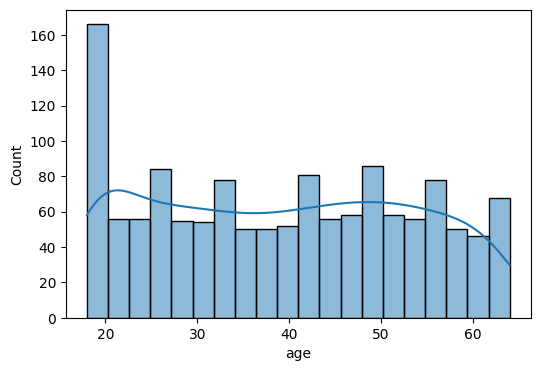

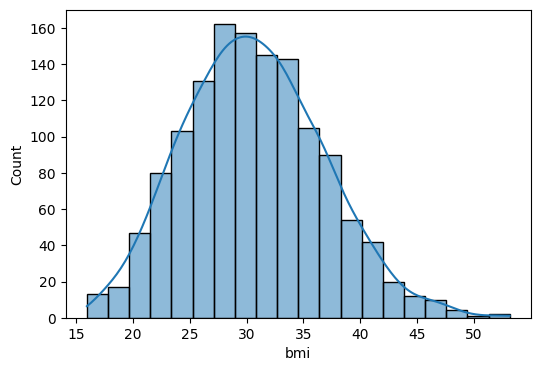

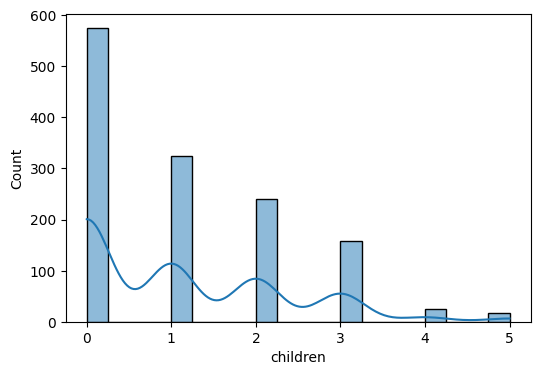

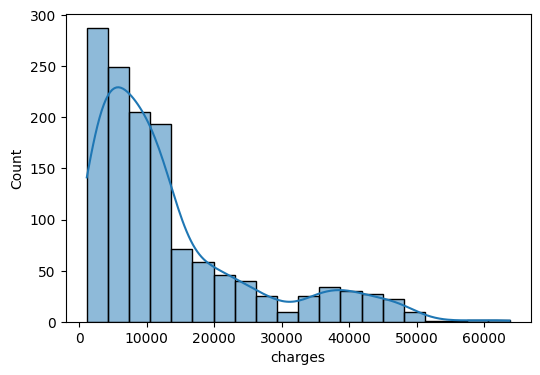

In [161]:
numeric_cols = ['age','bmi','children','charges']
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=20)

<Axes: xlabel='sex', ylabel='count'>

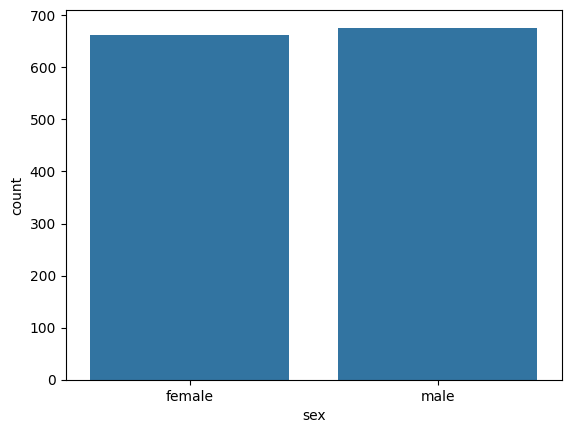

In [162]:
sns.countplot(x=df['sex'])

<Axes: xlabel='children', ylabel='count'>

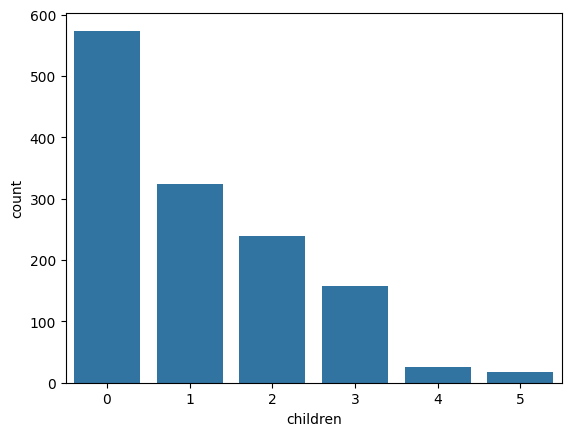

In [163]:
sns.countplot(x=df['children'])

<Axes: xlabel='smoker', ylabel='count'>

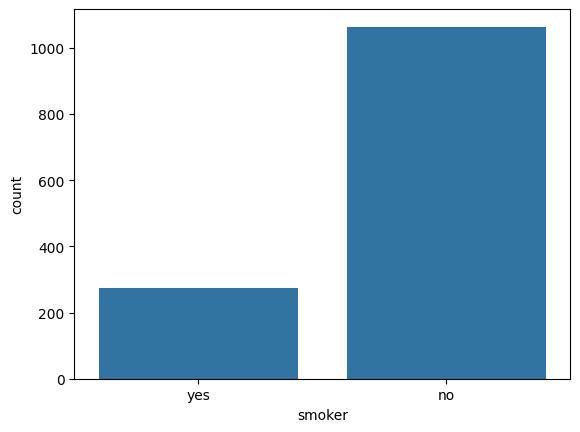

In [164]:
sns.countplot(x=df['smoker'])

<Axes: xlabel='region', ylabel='count'>

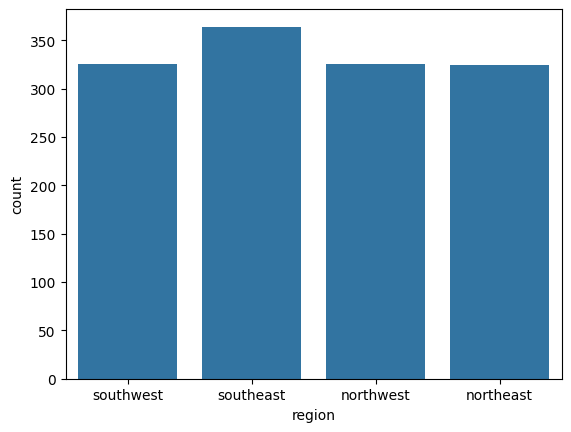

In [165]:
sns.countplot(x=df['region'])

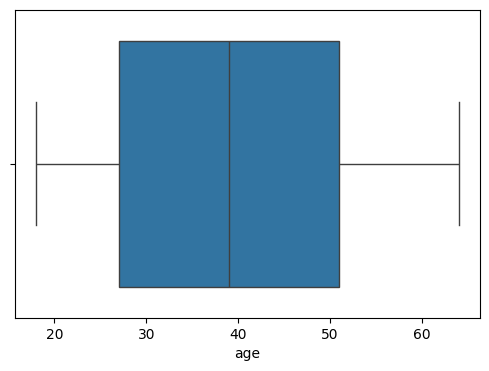

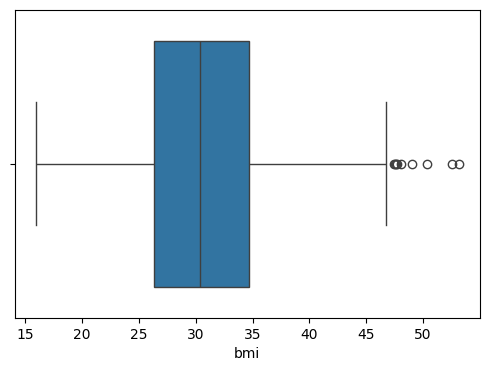

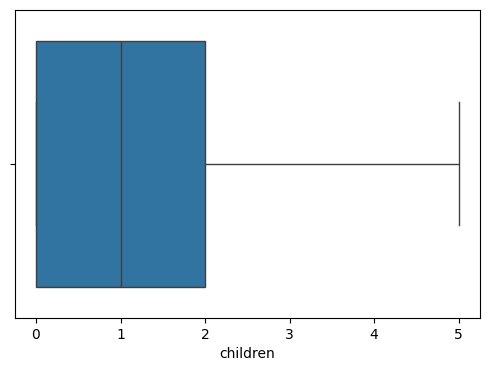

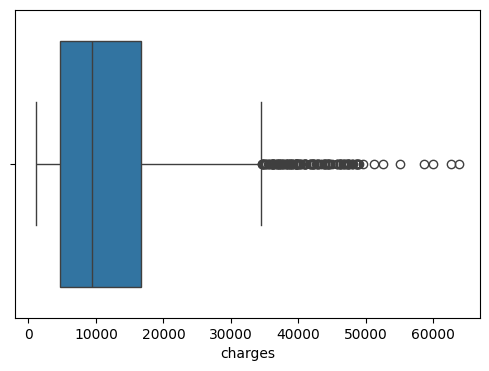

In [166]:
#box plo to check relation among output and input
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])

<Axes: >

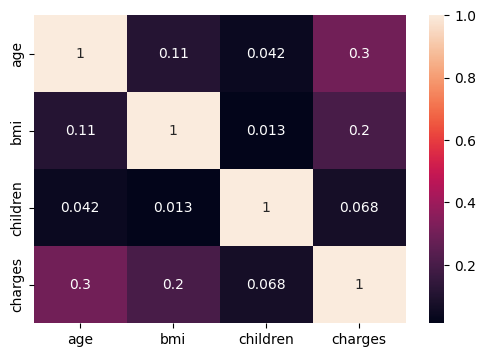

In [167]:
#correlation map for checking correlation among features
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(numeric_only=True), annot=True)

# **Data Cleaning & Preprocessing**

In [168]:
df_cleaned = df.copy()
df_cleaned.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [169]:
df_cleaned.duplicated().sum()

np.int64(1)

In [170]:
df_cleaned.drop_duplicates(inplace=True)
df_cleaned.shape

(1337, 7)

In [171]:
df_cleaned['sex'].value_counts()

sex
male      675
female    662
Name: count, dtype: int64

In [172]:
df_cleaned['sex'] = df_cleaned['sex'].map({"male":0, "female":1})
df_cleaned.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,southwest,16884.92400
1,18,0,33.770,1,no,southeast,1725.55230
2,28,0,33.000,3,no,southeast,4449.46200
3,33,0,22.705,0,no,northwest,21984.47061
4,32,0,28.880,0,no,northwest,3866.85520


In [173]:
df_cleaned['smoker'].value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

In [174]:
df_cleaned['smoker'] = df_cleaned['smoker'].map({"no":0, "yes":1})
df_cleaned.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [175]:
df_cleaned.rename(columns={
    "smoker":"is_smoker",
    "sex":"is_female"
},inplace=True)
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [176]:
df_cleaned = pd.get_dummies(df_cleaned,columns=['region'], drop_first=True)
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,False,False,True
1,18,0,33.770,1,0,1725.55230,False,True,False
2,28,0,33.000,3,0,4449.46200,False,True,False
3,33,0,22.705,0,0,21984.47061,True,False,False
4,32,0,28.880,0,0,3866.85520,True,False,False


In [177]:
df_cleaned = df_cleaned.astype(int)

In [178]:
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27,0,1,16884,0,0,1
1,18,0,33,1,0,1725,0,1,0
2,28,0,33,3,0,4449,0,1,0
3,33,0,22,0,0,21984,1,0,0
4,32,0,28,0,0,3866,1,0,0


# **Feature Engineering & Selection**

In [179]:
# bmi category will created as feature engineering
df_one = df_cleaned.copy()
df_one['category'] = pd.cut(
    df_one['bmi'],
    bins=[0, 18.5, 24.9, 29.9, float('inf')],
    labels=['Underweight','Normal','Overweight','Obese']
)

In [180]:
df_one.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,category
0,19,1,27,0,1,16884,0,0,1,Overweight
1,18,0,33,1,0,1725,0,1,0,Obese
2,28,0,33,3,0,4449,0,1,0,Obese
3,33,0,22,0,0,21984,1,0,0,Normal
4,32,0,28,0,0,3866,1,0,0,Overweight


In [181]:
df_one = pd.get_dummies(df_one,columns=['category'], drop_first=True)

In [182]:
df_one = df_one.astype(int)

In [183]:
df_one.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,category_Normal,category_Overweight,category_Obese
0,19,1,27,0,1,16884,0,0,1,0,1,0
1,18,0,33,1,0,1725,0,1,0,0,0,1
2,28,0,33,3,0,4449,0,1,0,0,0,1
3,33,0,22,0,0,21984,1,0,0,1,0,0
4,32,0,28,0,0,3866,1,0,0,0,1,0


In [184]:
df_one.columns

Index(['age', 'is_female', 'bmi', 'children', 'is_smoker', 'charges',
       'region_northwest', 'region_southeast', 'region_southwest',
       'category_Normal', 'category_Overweight', 'category_Obese'],
      dtype='object')

In [185]:
from sklearn.preprocessing import StandardScaler
cols = ['age', 'bmi','children']

scaler = StandardScaler()
df_one[cols] = scaler.fit_transform(df_one[cols])

df_one.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,category_Normal,category_Overweight,category_Obese
0,-1.440418,1,-0.517949,-0.909234,1,16884,0,0,1,0,1,0
1,-1.511647,0,0.462463,-0.079442,0,1725,0,1,0,0,0,1
2,-0.799350,0,0.462463,1.580143,0,4449,0,1,0,0,0,1
3,-0.443201,0,-1.334960,-0.909234,0,21984,1,0,0,1,0,0
4,-0.514431,0,-0.354547,-0.909234,0,3866,1,0,0,0,1,0


In [186]:
#pearson correlation cofficient for feature selection of numeric

from scipy.stats import pearsonr

# ----------------------------------
# Pearson Correlation Calculation
# ----------------------------------

# List of features to check against target
selected_features = [
    'age', 'bmi', 'children', 'is_female', 'is_smoker',
    'region_northwest', 'region_southeast', 'region_southwest',
    'category_Normal', 'category_Overweight', 'category_Obese'
]

correlations = {
    feature: pearsonr(df_one[feature], df_one['charges'])[0]
    for feature in selected_features
}
correlation_df = pd.DataFrame(list(correlations.items()), columns=['Feature', 'Pearson Correlation'])
correlation_df.sort_values(by='Pearson Correlation', ascending=False)

,Feature,Pearson Correlation
4,is_smoker,0.787234
0,age,0.298309
10,category_Obese,0.200348
1,bmi,0.196236
6,region_southeast,0.073577
2,children,0.067390
5,region_northwest,-0.038695
7,region_southwest,-0.043637
3,is_female,-0.058046
8,category_Normal,-0.104042


In [187]:
cat_features = [
    'is_female', 'is_smoker',
    'region_northwest', 'region_southeast', 'region_southwest',
    'category_Normal', 'category_Overweight', 'category_Obese'
]

In [188]:
#for categorical columns we use chi-square test for feature selection

from scipy.stats import chi2_contingency
import pandas as pd

alpha = 0.05

df_one['charges_bin'] = pd.qcut(df_one['charges'], q=4, labels=False)
chi2_results = {}

for col in cat_features:
    contingency = pd.crosstab(df_one[col], df_one['charges_bin'])
    chi2_stat, p_val, _, _ = chi2_contingency(contingency)
    decision = 'Reject Null (Keep Feature)' if p_val < alpha else 'Accept Null (Drop Feature)'
    chi2_results[col] = {
        'chi2_statistic': chi2_stat,
        'p_value': p_val,
        'Decision': decision
    }

chi2_df = pd.DataFrame(chi2_results).T
chi2_df = chi2_df.sort_values(by='p_value')
chi2_df

,chi2_statistic,p_value,Decision
is_smoker,848.219178,0.0,Reject Null (Keep Feature)
region_southeast,15.998167,0.001135,Reject Null (Keep Feature)
is_female,10.258784,0.01649,Reject Null (Keep Feature)
category_Obese,8.515711,0.036473,Reject Null (Keep Feature)
region_southwest,5.091893,0.165191,Accept Null (Drop Feature)
category_Overweight,4.25149,0.235557,Accept Null (Drop Feature)
category_Normal,3.708088,0.29476,Accept Null (Drop Feature)
region_northwest,1.13424,0.768815,Accept Null (Drop Feature)


In [189]:
final_df = df_one[['age', 'is_smoker', 'region_southeast', 'is_female', 'category_Obese', 'bmi', 'children', 'charges']]
final_df.head()

,age,is_smoker,region_southeast,is_female,category_Obese,bmi,children,charges
0,-1.440418,1,0,1,0,-0.517949,-0.909234,16884
1,-1.511647,0,1,0,1,0.462463,-0.079442,1725
2,-0.799350,0,1,0,1,0.462463,1.580143,4449
3,-0.443201,0,0,0,0,-1.334960,-0.909234,21984
4,-0.514431,0,0,0,0,-0.354547,-0.909234,3866


In [190]:
final_df.shape

(1337, 8)

# **Model Training**

In [191]:
X = final_df.drop('charges', axis=1)
y = final_df['charges']

In [192]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [193]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [194]:
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [195]:
from sklearn.metrics import r2_score

y_predict = model.predict(X_test)
r2 = r2_score(y_test, y_predict)
r2

0.8040712413347119

# **Model 2nd**

In [240]:
df_two = df_cleaned.copy()
df_two.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27,0,1,16884,0,0,1
1,18,0,33,1,0,1725,0,1,0
2,28,0,33,3,0,4449,0,1,0
3,33,0,22,0,0,21984,1,0,0
4,32,0,28,0,0,3866,1,0,0


<Axes: >

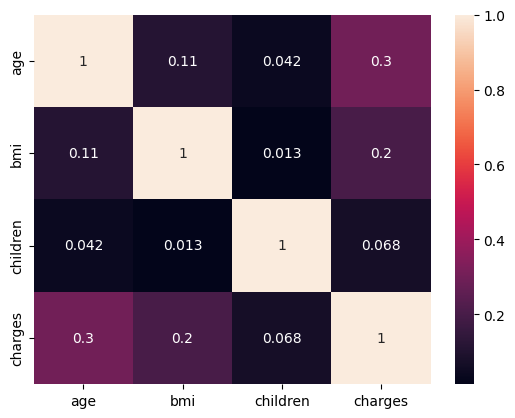

In [241]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

In [242]:
from sklearn.preprocessing import StandardScaler

features = ['age', 'bmi','children']
for feature in features:
    scaler = StandardScaler()
    df_two[feature] = scaler.fit_transform(df_two[[feature]])
df_two.head()


,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest
0,-1.440418,1,-0.517949,-0.909234,1,16884,0,0,1
1,-1.511647,0,0.462463,-0.079442,0,1725,0,1,0
2,-0.799350,0,0.462463,1.580143,0,4449,0,1,0
3,-0.443201,0,-1.334960,-0.909234,0,21984,1,0,0
4,-0.514431,0,-0.354547,-0.909234,0,3866,1,0,0


In [243]:
X = df_two.drop('charges', axis=1)
y = df_two['charges']

In [244]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [245]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_train, y_train)

y_predict = model.predict(X_test)

In [246]:
r2 = r2_score(y_test, y_predict)
print(f"R2 score: {r2} ")

R2 score: 0.8069435680345954 
